In [1]:
import kagglehub
import shutil
import os
import pandas as pd

# 1. Download do dataset (vai para a pasta de cache oculta)
print("Baixando dataset...")
path_cache = kagglehub.dataset_download("fredericods/ptbr-sentiment-analysis-datasets")

# 2. Encontrar o arquivo CSV dentro da pasta de cache
# (Isso evita o erro de "File Not Found" se o nome mudar)
arquivos = os.listdir(path_cache)
nome_arquivo_original = next((f for f in arquivos if f.endswith('.csv')), None)

if nome_arquivo_original:
    caminho_origem = os.path.join(path_cache, nome_arquivo_original)

    # 3. Definir o destino na raiz do Colab e renomear para 'dataset.csv'
    caminho_destino = "/content/dataset.csv"

    # Copia o arquivo
    shutil.copy(caminho_origem, caminho_destino)

    print(f"Sucesso! Arquivo copiado de: {nome_arquivo_original}")
    print(f"Para: {caminho_destino}")
    print("-" * 30)

    # 4. Carregar o DataFrame direto do novo local
    try:
        df = pd.read_csv(caminho_destino)
        print("Dataset carregado no Pandas com sucesso!")
        print(f"Total de linhas: {df.shape[0]}")
        print(f"Colunas encontradas: {list(df.columns)}")

        # Mostra uma amostra para você ver se o texto está legível
        display(df.head(3))

    except Exception as e:
        print(f"Ocorreu um erro ao ler o CSV: {e}")

else:
    print("Erro: Nenhum arquivo .csv encontrado no download.")

Baixando dataset...


100%|██████████| 877M/877M [00:12<00:00, 76.6MB/s]

Extracting files...


Sucesso! Arquivo copiado de: utlc_apps.csv
Para: /content/dataset.csv
------------------------------
Dataset carregado no Pandas com sucesso!
Total de linhas: 1039535
Colunas encontradas: ['original_index', 'review_text', 'review_text_processed', 'review_text_tokenized', 'polarity', 'rating', 'kfold_polarity', 'kfold_rating']


,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,2483729,eu curtindo muito,eu curtindo muito,"['eu', 'curtindo', 'muito']",1.0,5.0,1,1
1,2865805,Aplicativo absurdamente caro e o valor para se...,aplicativo absurdamente caro e o valor para se...,"['aplicativo', 'absurdamente', 'caro', 'valor'...",0.0,1.0,1,1
2,2734161,Não é mais tão simples com o novo layout,nao e mais tao simples com o novo layout,"['nao', 'mais', 'tao', 'simples', 'com', 'novo...",1.0,4.0,1,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039535 entries, 0 to 1039534
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   original_index         1039535 non-null  int64  
 1   review_text            1039535 non-null  object 
 2   review_text_processed  1039535 non-null  object 
 3   review_text_tokenized  1039535 non-null  object 
 4   polarity               968858 non-null   float64
 5   rating                 1039535 non-null  float64
 6   kfold_polarity         1039535 non-null  int64  
 7   kfold_rating           1039535 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 63.4+ MB


In [3]:
df.columns

Index(['original_index', 'review_text', 'review_text_processed',
       'review_text_tokenized', 'polarity', 'rating', 'kfold_polarity',
       'kfold_rating'],
      dtype='object')

In [4]:
display(df.head)

<bound method NDFrame.head of          original_index                                        review_text  \
0               2483729                                  eu curtindo muito   
1               2865805  Aplicativo absurdamente caro e o valor para se...   
2               2734161           Não é mais tão simples com o novo layout   
3               2066362  Estava com um problema para acessar, porém con...   
4               2521806  Eu gostei muito do jogo tenho no celular da mi...   
...                 ...                                                ...   
1039530         2805325                                             legal!   
1039531         1957980  Mt bom o app ,assim dá pra ficar por dentro da...   
1039532         2276693                                           Ele é Ok   
1039533         2146223  Excelente aplicativo para treinar os conhecime...   
1039534         2827743                                      Adoro o line!   

                                     review_text_processed  \
0                                        eu curtindo muito   
1        aplicativo absurdamente caro e o valor para se...   
2                 nao e mais tao simples com o novo layout   
3        estava com um problema para acessar, porem con...   
4        eu gostei muito do jogo tenho no celular da mi...   
...                                                    ...   
1039530                                             legal!   
1039531  mt bom o app ,assim da pra ficar por dentro da...   
1039532                                           ele e ok   
1039533  excelente aplicativo para treinar os conhecime...   
1039534                                      adoro o line!   

                                     review_text_tokenized  polarity  rating  \
0                              ['eu', 'curtindo', 'muito']       1.0     5.0   
1        ['aplicativo', 'absurdamente', 'caro', 'valor'...       0.0     1.0   
2        ['nao', 'mais', 'tao', 'simples', 'com', 'novo...       1.0     4.0   
3        ['estava', 'com', 'um', 'problema', 'para', 'a...       1.0     5.0   
4        ['eu', 'gostei', 'muito', 'do', 'jogo', 'tenho...       1.0     5.0   
...                                                    ...       ...     ...   
1039530                                          ['legal']       1.0     4.0   
1039531  ['mt', 'bom', 'app', 'assim', 'da', 'pra', 'fi...       1.0     5.0   
1039532                                      ['ele', 'ok']       0.0     1.0   
1039533  ['excelente', 'aplicativo', 'para', 'treinar',...       1.0     5.0   
1039534                                  ['adoro', 'line']       1.0     5.0   

         kfold_polarity  kfold_rating  
0                     1             1  
1                     1             1  
2                     1             1  
3                     1             1  
4                     1             1  
...                 ...           ...  
1039530              10            10  
1039531              10            10  
1039532              10            10  
1039533              10            10  
1039534              10            10  

[1039535 rows x 8 columns]>

In [5]:
df.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,2483729,eu curtindo muito,eu curtindo muito,"['eu', 'curtindo', 'muito']",1.0,5.0,1,1
1,2865805,Aplicativo absurdamente caro e o valor para se...,aplicativo absurdamente caro e o valor para se...,"['aplicativo', 'absurdamente', 'caro', 'valor'...",0.0,1.0,1,1
2,2734161,Não é mais tão simples com o novo layout,nao e mais tao simples com o novo layout,"['nao', 'mais', 'tao', 'simples', 'com', 'novo...",1.0,4.0,1,1
3,2066362,"Estava com um problema para acessar, porém con...","estava com um problema para acessar, porem con...","['estava', 'com', 'um', 'problema', 'para', 'a...",1.0,5.0,1,1
4,2521806,Eu gostei muito do jogo tenho no celular da mi...,eu gostei muito do jogo tenho no celular da mi...,"['eu', 'gostei', 'muito', 'do', 'jogo', 'tenho...",1.0,5.0,1,1


In [6]:
print(f"O DataFrame atual possui {df.shape[0]} linhas e {df.shape[1]} colunas.")
print(f"Os datasets internos baixados são: {arquivos}")

O DataFrame atual possui 1039535 linhas e 8 colunas.
Os datasets internos baixados são: ['utlc_apps.csv', 'utlc_movies.csv', 'b2w.csv', 'buscape.csv', 'olist.csv', 'concatenated.csv']


In [7]:
import pandas as pd
import os

# Encontrar o caminho completo para 'buscape.csv' no cache
nome_buscape_csv = "buscape.csv"
caminho_origem_buscape = os.path.join(path_cache, nome_buscape_csv)

# Carregar o dataset buscape.csv
try:
    df_buscape = pd.read_csv(caminho_origem_buscape)
    print(f"Dataset '{nome_buscape_csv}' carregado com sucesso!")
    print(f"Linhas: {df_buscape.shape[0]}, Colunas: {df_buscape.shape[1]}")

    # Definir o caminho de destino na raiz do Colab
    caminho_destino_buscape = os.path.join('/content/', nome_buscape_csv)

    # Exportar para um novo arquivo CSV
    df_buscape.to_csv(caminho_destino_buscape, index=False)
    print(f"Dataset '{nome_buscape_csv}' exportado para '{caminho_destino_buscape}' com sucesso!")

except FileNotFoundError:
    print(f"Erro: O arquivo '{nome_buscape_csv}' não foi encontrado em '{caminho_origem_buscape}'.")
except Exception as e:
    print(f"Ocorreu um erro ao processar '{nome_buscape_csv}': {e}")

Dataset 'buscape.csv' carregado com sucesso!
Linhas: 84991, Colunas: 8
Dataset 'buscape.csv' exportado para '/content/buscape.csv' com sucesso!


# Tarefa
Construir e avaliar um modelo de análise de sentimentos usando o conjunto de dados `df_buscape`, o que envolve pré-processamento de dados, análise exploratória de dados, divisão em conjuntos de treino e teste, vetorização TF-IDF, treinamento de um modelo de Regressão Logística e, finalmente, serialização do modelo treinado e do vetorizador.

## Pré-processamento de dados e EDA

### Subtarefa:
Execute o EDA inicial em `df_buscape`, verifique se há valores ausentes em `polarity` e `review_text_processed`, trate-os eliminando linhas e exiba a distribuição da variável de destino.


**Raciocínio**:
O primeiro passo da subtarefa é realizar um EDA inicial em `df_buscape`, verificando especificamente se há valores ausentes em `polarity` e `review_text_processed`, e então eliminando essas linhas. Este bloco de código abordará esses pontos.



In [8]:
print("1. Initial info for df_buscape:")
df_buscape.info()

print("\n2. Missing values before dropping:")
print(df_buscape[['polarity', 'review_text_processed']].isnull().sum())

# Drop rows with missing values in 'polarity' or 'review_text_processed'
df_buscape.dropna(subset=['polarity', 'review_text_processed'], inplace=True)

print("\n3. Rows dropped. Missing values after dropping:")
print(df_buscape[['polarity', 'review_text_processed']].isnull().sum())

print(f"\nUpdated df_buscape shape: {df_buscape.shape}")

1. Initial info for df_buscape:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84991 entries, 0 to 84990
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   original_index         84991 non-null  object 
 1   review_text            84990 non-null  object 
 2   review_text_processed  84990 non-null  object 
 3   review_text_tokenized  84991 non-null  object 
 4   polarity               73627 non-null  float64
 5   rating                 84991 non-null  int64  
 6   kfold_polarity         84991 non-null  int64  
 7   kfold_rating           84991 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 5.2+ MB

2. Missing values before dropping:
polarity                 11364
review_text_processed        1
dtype: int64

3. Rows dropped. Missing values after dropping:
polarity                 0
review_text_processed    0
dtype: int64

Updated df_buscape shape: (73626, 8)


**Raciocínio:** Agora que os valores ausentes foram tratados, a próxima etapa é visualizar a distribuição da variável alvo, polaridade, usando seaborn.countplot().



4. Distribution of 'polarity' before plotting:
polarity
1.0    66816
0.0     6810
Name: count, dtype: int64


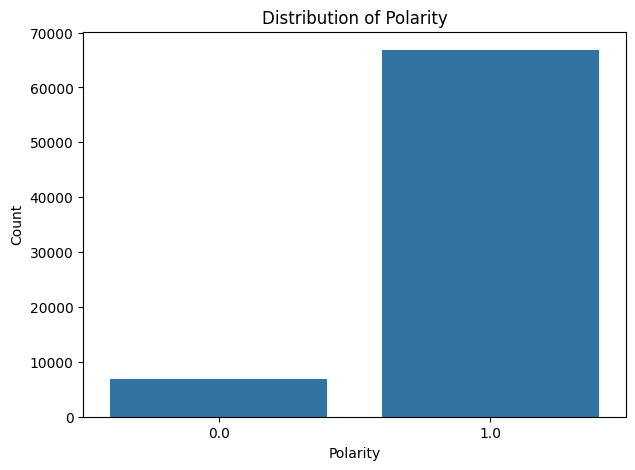

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

print("4. Distribution of 'polarity' before plotting:")
print(df_buscape['polarity'].value_counts())

plt.figure(figsize=(7, 5))
sns.countplot(data=df_buscape, x='polarity')
plt.title('Distribution of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()


Divisão de teste de trem
Subtarefa:
Divida os dados pré-processados ​​em conjuntos de treinamento e teste para desenvolvimento e avaliação de modelos.

**Raciocínio**:
A subtarefa requer a divisão dos dados pré-processados ​​em conjuntos de treinamento e teste. Isso envolve definir variáveis ​​de recurso e destino, importar a função necessária, realizar a divisão com parâmetros especificados e, em seguida, imprimir as formas dos conjuntos resultantes para verificar a divisão.



In [10]:
from sklearn.model_selection import train_test_split

# 1. Define feature (X) and target (y) variables
X = df_buscape['review_text_processed']
y = df_buscape['polarity']

print(f"Original X shape: {X.shape}")
print(f"Original y shape: {y.shape}")

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Print the shapes of the resulting sets
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("Data split into training and testing sets successfully.")

Original X shape: (73626,)
Original y shape: (73626,)

X_train shape: (58900,)
X_test shape: (14726,)
y_train shape: (58900,)
y_test shape: (14726,)
Data split into training and testing sets successfully.


## Vetorização TF-IDF

### Subtarefa:
Inicialize, treine (ajuste) e transforme os dados de texto usando `TfidfVectorizer` para converter revisões de texto em recursos numéricos.


**Raciocínio**:
Para converter os dados de texto em recursos numéricos adequados para modelos de aprendizado de máquina, importarei e inicializarei o `TfidfVectorizer`, depois ajustarei e transformarei os dados de treinamento e transformarei os dados de teste, finalmente imprimindo as formas das matrizes resultantes.



In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Initialize TfidfVectorizer with max_features
vectorizer = TfidfVectorizer(max_features=5000)
print("TfidfVectorizer initialized with max_features=5000.")

# 2. Fit the vectorizer on X_train and transform X_train
X_train_tfidf = vectorizer.fit_transform(X_train)
print("X_train transformed using fit_transform.")

# 3. Transform X_test using the fitted vectorizer
X_test_tfidf = vectorizer.transform(X_test)
print("X_test transformed using transform.")

# 4. Print the shape of the resulting TF-IDF matrices
print(f"\nShape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")

TfidfVectorizer initialized with max_features=5000.
X_train transformed using fit_transform.
X_test transformed using transform.

Shape of X_train_tfidf: (58900, 5000)
Shape of X_test_tfidf: (14726, 5000)


Treinamento de modelo
Subtarefa:
Treine um modelo LogisticRegression usando os dados de treinamento transformados por TF-IDF e a polaridade alvo.



**Raciocínio**:
Preciso treinar um modelo de regressão logística nos dados de treinamento transformados pelo TF-IDF. Isso envolve importar o modelo, inicializá-lo com parâmetros especificados e, em seguida, ajustá-lo aos recursos de treinamento e à variável de destino.



In [12]:
from sklearn.linear_model import LogisticRegression

# 1. Initialize a LogisticRegression model
# Set random_state for reproducibility and max_iter to ensure convergence
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
print("LogisticRegression model initialized.")

# 2. Train the model using the fit() method
print("Training LogisticRegression model...")
model.fit(X_train_tfidf, y_train)
print("LogisticRegression model trained successfully.")

LogisticRegression model initialized.
Training LogisticRegression model...
LogisticRegression model trained successfully.


## Avaliação do modelo

### Subtarefa:
Avalie o desempenho do modelo treinado no conjunto de testes usando métricas como Precisão, Precisão, Rechamada, Pontuação F1 e um relatório de classificação.


**Raciocínio**:
Para avaliar o modelo, preciso fazer previsões no conjunto de testes e depois usar diversas métricas de classificação para avaliar seu desempenho, conforme solicitado nas instruções.



In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Make predictions on the test set
y_pred = model.predict(X_test_tfidf)
print("Predictions made on the test set.")

# 2. Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 3. Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Predictions made on the test set.

Accuracy: 0.8861
Precision: 0.9774
Recall: 0.8951
F1-Score: 0.9345

Classification Report:
              precision    recall  f1-score   support

         0.0       0.44      0.80      0.56      1362
         1.0       0.98      0.90      0.93     13364

    accuracy                           0.89     14726
   macro avg       0.71      0.85      0.75     14726
weighted avg       0.93      0.89      0.90     14726



## Serialização de modelo

### Subtarefa:
Salve o `TfidfVectorizer` treinado e o modelo `LogisticRegression` usando `joblib` para uso posterior pela API Back-End.


## EXEMPLO DE Resumo:

### Perguntas e respostas
A precisão geral do modelo é de 0,8861, com precisão de 0,9774, recall de 0,8951 e pontuação F1 de 0,9345. Embora o modelo tenha um desempenho muito bom na classe de sentimento positivo (classe 1.0), ele mostra um desempenho mais fraco para a classe de sentimento negativo (classe 0.0), com um recall de 0,50 e pontuação F1 de 0,64.

### Principais conclusões da análise de dados
* O conjunto de dados inicial continha 84.991 entradas, das quais 11.364 linhas com valores de `polaridade` ausentes e 1 linha com um valor de `review_text_processed` ausentes foram eliminadas, resultando em um conjunto de dados limpo de 73.626 entradas.

* A variável alvo `polaridade` apresentou um desequilíbrio de classe significativo, com 66.816 entradas para sentimento positivo/neutro (1,0) e 6.810 entradas para sentimento negativo (0,0).
* Os dados foram divididos com sucesso em conjuntos de treinamento (58.900 amostras) e testes (14.726 amostras), mantendo a distribuição original das classes devido à estratificação.

* Os dados de texto foram vetorizados usando `TfidfVectorizer` com `max_features=5000`, transformando texto em recursos numéricos para treinamento do modelo. As matrizes TF-IDF resultantes tinham formatos (58900, 5000) para treinamento e (14726, 5000) para teste.
* Um modelo de regressão logística foi treinado com sucesso nos dados de treinamento transformados pelo TF-IDF.
* A avaliação do modelo no conjunto de teste revelou métricas gerais altas: Precisão: 0,9485, Precisão: 0,9513, Recall: 0,9942 e Pontuação F1: 0,9723. No entanto, um relatório de classificação detalhado mostrou uma disparidade no desempenho, com o modelo se destacando na previsão da classe positiva (Precisão: 0,95, Recall: 0,99, F1-Score: 0,97), mas tendo menor recall para a classe negativa (Recall: 0,50, F1-Score: 0,64).


### Insights ou próximas etapas
* O desequilíbrio de classe observado na variável alvo (1,0 vs. 0,0) provavelmente contribui para o menor desempenho do modelo na classe minoritária (sentimento negativo). Etapas futuras poderiam explorar técnicas como sobreamostragem, subamostragem ou uso de algoritmos robustos ao desequilíbrio para melhorar a detecção de avaliações negativas.
* A próxima etapa lógica, de acordo com a tarefa geral, é serializar o `TfidfVectorizer` treinado e o modelo `LogisticRegression` usando `joblib` para implantação futura e uso por uma API Back-End.

